<a href="https://colab.research.google.com/github/VISHNU-ARAVIND-99/Machine_Learning/blob/main/carprices_predictions(one_hot_encoding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("/content/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


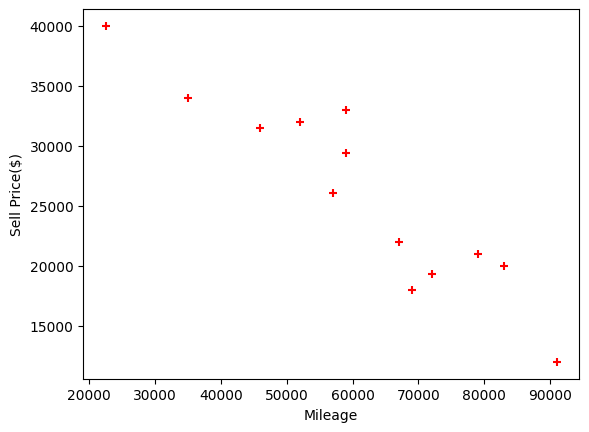

In [39]:
import matplotlib.pyplot as plt

plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(df["Mileage"],df["Sell Price($)"],color='red',marker='+')

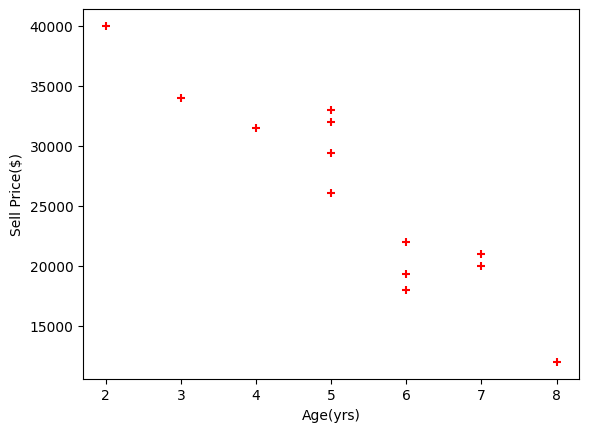

In [40]:
plt.xlabel("Age(yrs)")
plt.ylabel("Sell Price($)")
plt.scatter(df["Age(yrs)"],df["Sell Price($)"],color='red',marker='+')

In [41]:
onehotencoding = pd.get_dummies(df["Car Model"])
onehotencoding

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [42]:
merged = pd.concat([df, onehotencoding], axis="columns")
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [43]:
final_df = merged.drop(["Car Model", "Mercedez Benz C class"], axis="columns")
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [44]:
X = final_df.drop(["Sell Price($)"], axis="columns")
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(X=X, y=final_df["Sell Price($)"])

LinearRegression()

In [47]:
model.score(X, final_df["Sell Price($)"])

0.9417050937281082